In [4]:
emotion_map = {
    # anger
    "anger": "anger",
    "annoyance": "anger",
    "disapproval": "anger",

    # disgust
    "disgust": "disgust",

    # fear
    "fear": "fear",
    "nervousness": "fear",

    # joy (positive and social-positive)
    "amusement": "joy",
    "excitement": "joy",
    "joy": "joy",
    "love": "joy",
    "optimism": "joy",
    "pride": "joy",
    "realization": "joy",
    "relief": "joy",
    "admiration": "joy",
    "approval": "joy",
    "gratitude": "joy",
    "desire": "joy",
    "caring": "joy",

    # sadness
    "sadness": "sadness",
    "disappointment": "sadness",
    "embarrassment": "sadness",
    "remorse": "sadness",
    "grief": "sadness",

    # surprise
    "surprise": "surprise",
    "confusion": "surprise",
    "curiosity": "surprise",

    # neutral
    "neutral": "neutral"
}


In [5]:
polarity_map = {
    # positive
    "admiration": "positive",
    "amusement": "positive",
    "approval": "positive",
    "caring": "positive",
    "desire": "positive",
    "excitement": "positive",
    "gratitude": "positive",
    "joy": "positive",
    "love": "positive",
    "optimism": "positive",
    "pride": "positive",
    "relief": "positive",

    # negative
    "anger": "negative",
    "annoyance": "negative",
    "disappointment": "negative",
    "disapproval": "negative",
    "disgust": "negative",
    "embarrassment": "negative",
    "fear": "negative",
    "grief": "negative",
    "nervousness": "negative",
    "remorse": "negative",
    "sadness": "negative",

    # ambiguous
    "confusion": "ambiguous",
    "curiosity": "ambiguous",
    "realization": "ambiguous",
    "surprise": "ambiguous",

    # neutral
    "neutral": "neutral"
}


In [6]:
import pandas as pd

df = pd.read_csv("reddit_with_emotions_full.csv")  # or read_excel if it’s xlsx

# quick peek
print(df.shape)
print(df.columns)

# check missing values
df.isna().sum().sort_values(ascending=False).head(20)

# basic counts
print(df['finance_label'].value_counts())
print(df['top_emotion'].value_counts().head(20))


(106963, 44)
Index(['author', 'title', 'score', 'created', 'link', 'text', 'url', 'year',
       'year_month', 'finance_label', 'finance_score', 'combined_text',
       'emotions', 'top_emotion', 'top_emotion_score', 'emotion_admiration',
       'emotion_amusement', 'emotion_anger', 'emotion_annoyance',
       'emotion_approval', 'emotion_caring', 'emotion_confusion',
       'emotion_curiosity', 'emotion_desire', 'emotion_disappointment',
       'emotion_disapproval', 'emotion_disgust', 'emotion_embarrassment',
       'emotion_excitement', 'emotion_fear', 'emotion_gratitude',
       'emotion_grief', 'emotion_joy', 'emotion_love', 'emotion_nervousness',
       'emotion_optimism', 'emotion_pride', 'emotion_realization',
       'emotion_relief', 'emotion_remorse', 'emotion_sadness',
       'emotion_surprise', 'emotion_neutral', 'num_emotions'],
      dtype='object')
finance_label
not finance    99526
finance         7437
Name: count, dtype: int64
top_emotion
sadness           24327
disapp

In [7]:
df["basic_emotion"] = df["top_emotion"].map(emotion_map)



In [8]:
df[df["basic_emotion"].isna()]["top_emotion"].value_counts()


Series([], Name: count, dtype: int64)

In [9]:

df["emotion_polarity"] = df["top_emotion"].map(polarity_map)
df["emotion_polarity"].isna().sum()


0

In [10]:
finance_counts = df["finance_label"].value_counts()
finance_perc = df["finance_label"].value_counts(normalize=True) * 100

print(finance_counts)
print(finance_perc.round(1))


finance_label
not finance    99526
finance         7437
Name: count, dtype: int64
finance_label
not finance    93.0
finance         7.0
Name: proportion, dtype: float64


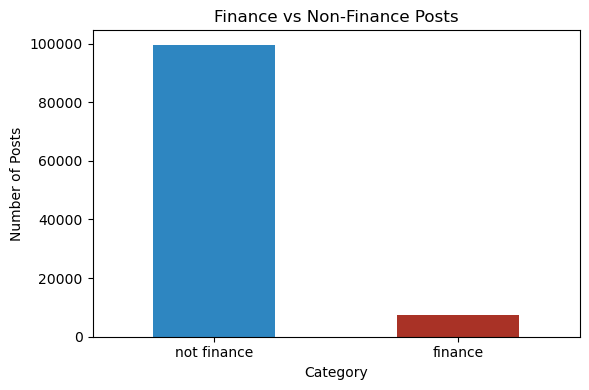

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
finance_counts.plot(kind='bar', color=["#2E86C1", "#A93226"])
plt.title("Finance vs Non-Finance Posts")
plt.xlabel("Category")
plt.ylabel("Number of Posts")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [12]:
pol_counts = df["emotion_polarity"].value_counts()
pol_perc = df["emotion_polarity"].value_counts(normalize=True) * 100

print(pol_counts)
print(pol_perc.round(1))


emotion_polarity
negative     63433
ambiguous    23402
positive     13063
neutral       7065
Name: count, dtype: int64
emotion_polarity
negative     59.3
ambiguous    21.9
positive     12.2
neutral       6.6
Name: proportion, dtype: float64


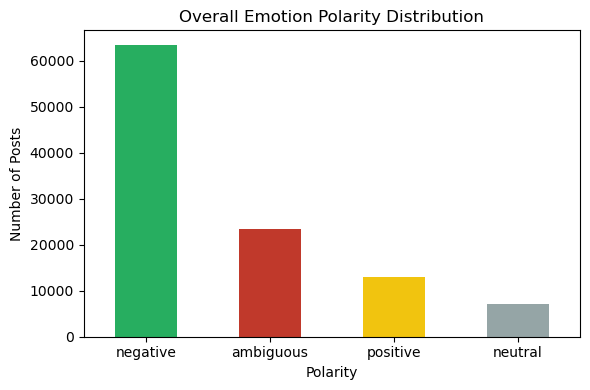

In [13]:
plt.figure(figsize=(6,4))
pol_counts.plot(kind='bar', color=["#27AE60", "#C0392B", "#F1C40F", "#95A5A6"])
plt.title("Overall Emotion Polarity Distribution")
plt.xlabel("Polarity")
plt.ylabel("Number of Posts")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [14]:
basic_counts = df["basic_emotion"].value_counts()
basic_perc = df["basic_emotion"].value_counts(normalize=True) * 100

print(basic_counts)
print(basic_perc.round(1))


basic_emotion
sadness     42394
surprise    21208
joy         15257
fear        11606
anger        8371
neutral      7065
disgust      1062
Name: count, dtype: int64
basic_emotion
sadness     39.6
surprise    19.8
joy         14.3
fear        10.9
anger        7.8
neutral      6.6
disgust      1.0
Name: proportion, dtype: float64


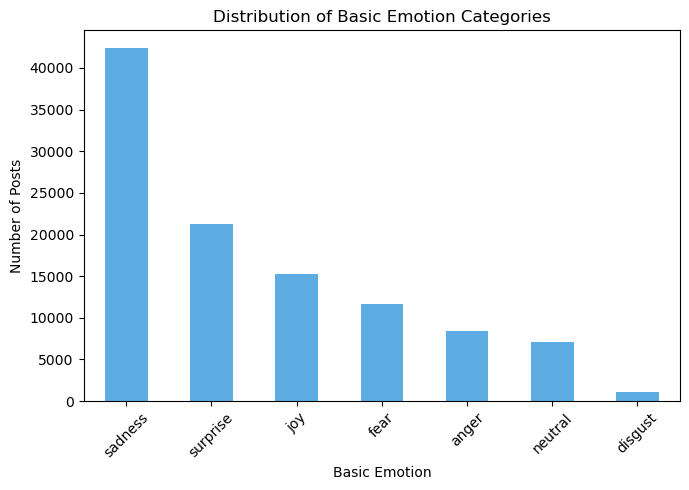

In [15]:
plt.figure(figsize=(7,5))
basic_counts.plot(kind='bar', color="#5DADE2")
plt.title("Distribution of Basic Emotion Categories")
plt.xlabel("Basic Emotion")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
ct_basic = pd.crosstab(df["finance_label"], df["basic_emotion"])
print(ct_basic)


basic_emotion  anger  disgust   fear    joy  neutral  sadness  surprise
finance_label                                                          
finance          492       49    641   1114      564     3698       879
not finance     7879     1013  10965  14143     6501    38696     20329


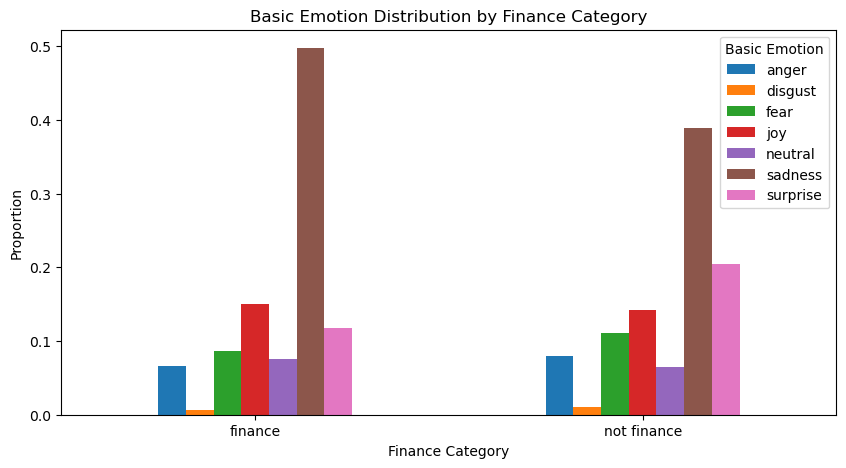

In [17]:
(ct_basic.T / ct_basic.T.sum()).T.plot(
    kind="bar",
    figsize=(10,5)
)
plt.title("Basic Emotion Distribution by Finance Category")
plt.xlabel("Finance Category")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.legend(title="Basic Emotion")
plt.show()


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [19]:
chi2, p, dof, expected = chi2_contingency(ct_basic)
print("Chi-square:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)


Chi-square: 538.9098855106487
p-value: 3.470332018836433e-113
Degrees of freedom: 6


In [20]:
ct_polarity = pd.crosstab(df["finance_label"], df["emotion_polarity"])
print(ct_polarity)


emotion_polarity  ambiguous  negative  neutral  positive
finance_label                                           
finance                1024      4880      564       969
not finance           22378     58553     6501     12094


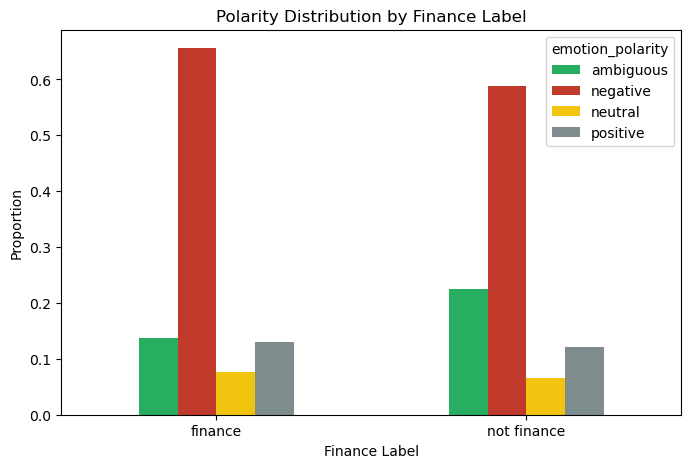

In [21]:
(ct_polarity.T / ct_polarity.T.sum()).T.plot(
    kind="bar",
    figsize=(8,5),
    color=["#27AE60", "#C0392B", "#F1C40F", "#7F8C8D"]
)
plt.title("Polarity Distribution by Finance Label")
plt.xlabel("Finance Label")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.show()


In [22]:
chi2, p, dof, expected = chi2_contingency(ct_polarity)
print("Chi-square:", chi2)
print("p-value:", p)


Chi-square: 309.9449828283644
p-value: 7.002916992532681e-67


Total posts in 2024: 106850

Posts per month in 2024:
   year_month  total_posts
0     2024-01         9469
1     2024-02         9291
2     2024-03         9156
3     2024-04         9303
4     2024-05         9592
5     2024-06         7980
6     2024-07         8240
7     2024-08         8823
8     2024-09         8407
9     2024-10         9137
10    2024-11         8766
11    2024-12         8686


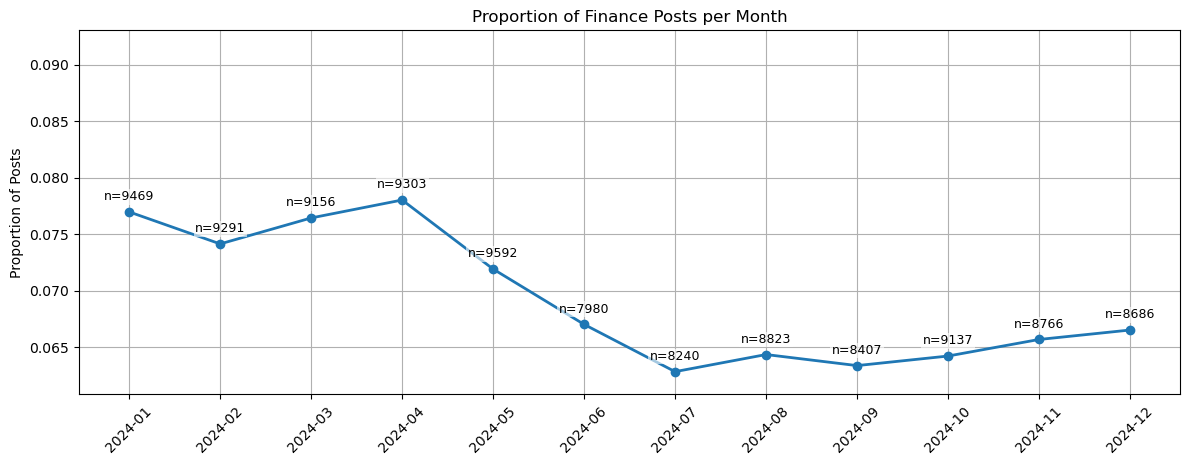

In [45]:
# Keep only posts from 2024
df_2024 = df[df["year_month"].str.startswith("2024")].copy()

print("Total posts in 2024:", df_2024.shape[0])

# Monthly finance vs non-finance counts
monthly_24 = df_2024.groupby(["year_month", "finance_label"]).size().reset_index(name="count")

# Monthly total posts
monthly_totals = df_2024.groupby("year_month").size().reset_index(name="total_posts")

print("\nPosts per month in 2024:")
print(monthly_totals)

# Merge totals so we can annotate later
finance_ratio_24 = monthly_24[monthly_24["finance_label"] == "finance"].copy()
finance_ratio_24["total_posts"] = finance_ratio_24["year_month"].map(
    dict(zip(monthly_totals["year_month"], monthly_totals["total_posts"]))
)

# Ratio calculation
finance_ratio_24["ratio"] = finance_ratio_24["count"] / finance_ratio_24["total_posts"]

# Dynamic offset
y_min, y_max = finance_ratio_24["ratio"].min(), finance_ratio_24["ratio"].max()
offset = (y_max - y_min) * 0.05

plt.figure(figsize=(12,5))
plt.plot(
    finance_ratio_24["year_month"],
    finance_ratio_24["ratio"],
    marker="o",
    linewidth=2
)

# Add labels
for i, row in finance_ratio_24.iterrows():
    plt.text(
        row["year_month"],
        row["ratio"] + offset,
        f'n={row["total_posts"]}',
        ha='center',
        va='bottom',
        fontsize=9,
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', pad=1)
    )

# Keep axis tight and clean
plt.ylim(y_min - 0.002, y_max + 0.015)

plt.xticks(rotation=45)
plt.ylabel("Proportion of Posts")
plt.title("Proportion of Finance Posts per Month")
plt.grid(True)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



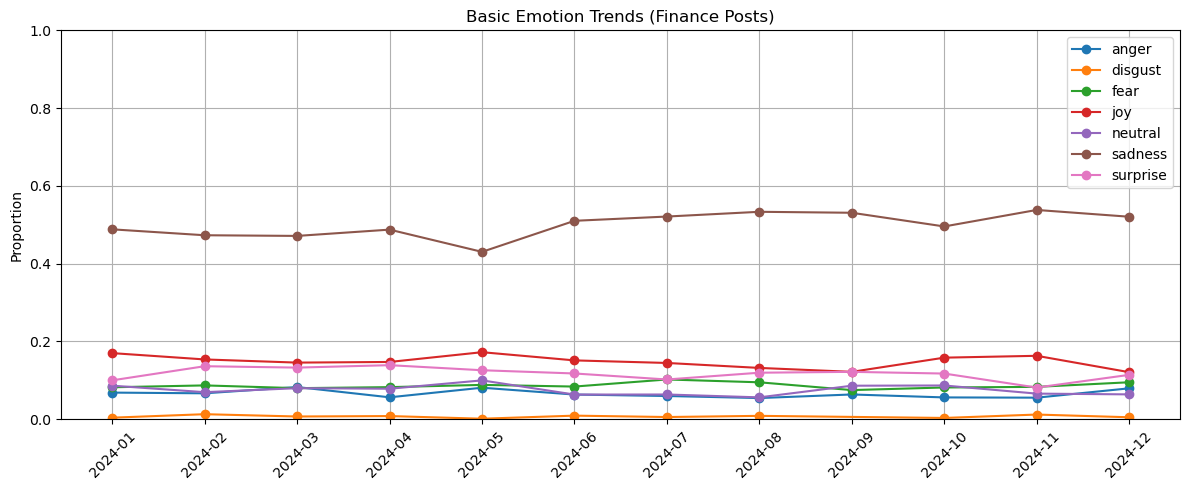

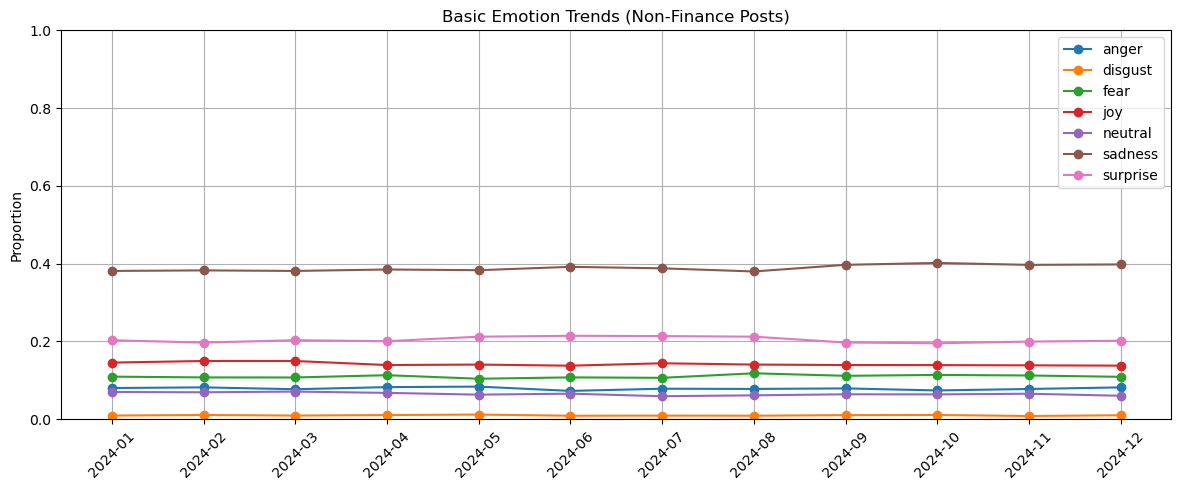

In [44]:
finance_24 = df_2024[df_2024["finance_label"] == "finance"]

# Count basic emotions per month
emo_time_24 = (
    finance_24.groupby(["year_month", "basic_emotion"])
    .size()
    .reset_index(name="count")
)

# Convert to proportion within each month
emo_time_24["ratio"] = emo_time_24.groupby("year_month")["count"].transform(lambda x: x / x.sum())

# Plot
plt.figure(figsize=(12,5))
for emo in emo_time_24["basic_emotion"].unique():
    subset = emo_time_24[emo_time_24["basic_emotion"] == emo]
    plt.plot(subset["year_month"], subset["ratio"], marker="o", label=emo)

plt.xticks(rotation=45)
plt.ylabel("Proportion")
plt.title("Basic Emotion Trends (Finance Posts)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.ylim(0, 1)

plt.show()



not_finance_24 = df_2024[df_2024["finance_label"] == "not finance"]

# Count basic emotions per month
emo_time_24 = (
    not_finance_24.groupby(["year_month", "basic_emotion"])
    .size()
    .reset_index(name="count")
)

# Convert to proportion within each month
emo_time_24["ratio"] = emo_time_24.groupby("year_month")["count"].transform(lambda x: x / x.sum())

# Plot
plt.figure(figsize=(12,5))
for emo in emo_time_24["basic_emotion"].unique():
    subset = emo_time_24[emo_time_24["basic_emotion"] == emo]
    plt.plot(subset["year_month"], subset["ratio"], marker="o", label=emo)

plt.xticks(rotation=45)
plt.ylabel("Proportion")
plt.title("Basic Emotion Trends (Non-Finance Posts)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.ylim(0, 1)

plt.show()



In [39]:
df_2024 = df[df["year_month"].str.startswith("2024")].copy()
print("Total posts in 2024:", df_2024.shape[0])

# Only finance posts
finance_24 = df_2024[df_2024["finance_label"] == "finance"].copy()

# Total number of finance posts per month (denominator)
fin_month_totals = (
    finance_24.groupby("year_month")
    .size()
    .reset_index(name="total_fin_posts")
)

# Count of each emotion per month among finance posts (numerator)
emo_fin_24 = (
    finance_24.groupby(["year_month", "basic_emotion"])
    .size()
    .reset_index(name="emotion_count")
)

# Merge to get total per month, then compute ratio
emo_fin_24 = emo_fin_24.merge(fin_month_totals, on="year_month", how="left")
emo_fin_24["ratio"] = emo_fin_24["emotion_count"] / emo_fin_24["total_fin_posts"]


# Only non-finance posts
not_fin_24 = df_2024[df_2024["finance_label"] == "not finance"].copy()

# Total number of non-finance posts per month (denominator)
nf_month_totals = (
    not_fin_24.groupby("year_month")
    .size()
    .reset_index(name="total_nf_posts")
)

# Count of each emotion per month among non-finance posts (numerator)
emo_notfin_24 = (
    not_fin_24.groupby(["year_month", "basic_emotion"])
    .size()
    .reset_index(name="emotion_count")
)

# Merge to get total per month, then compute ratio
emo_notfin_24 = emo_notfin_24.merge(nf_month_totals, on="year_month", how="left")
emo_notfin_24["ratio"] = emo_notfin_24["emotion_count"] / emo_notfin_24["total_nf_posts"]


Total posts in 2024: 106850


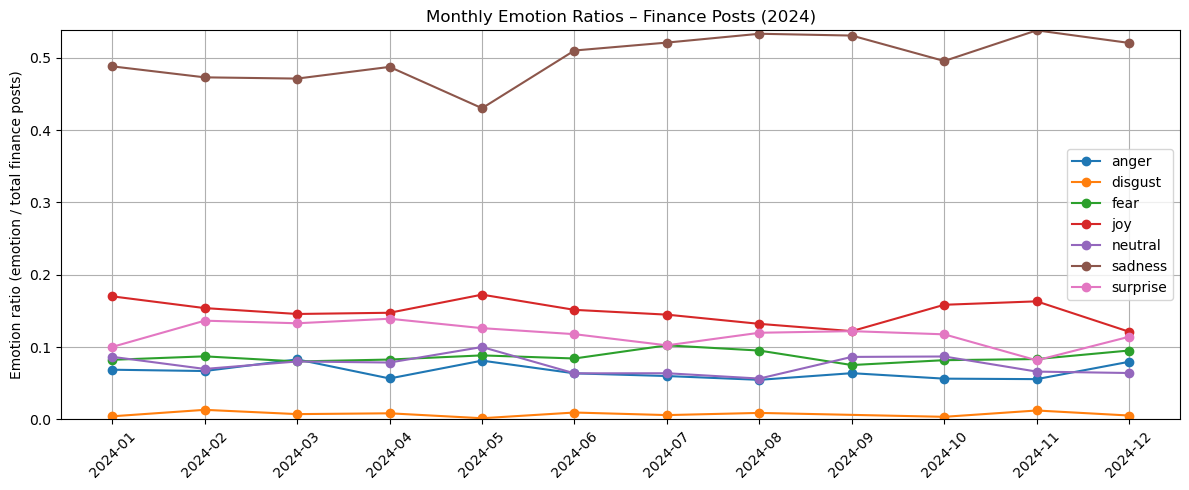

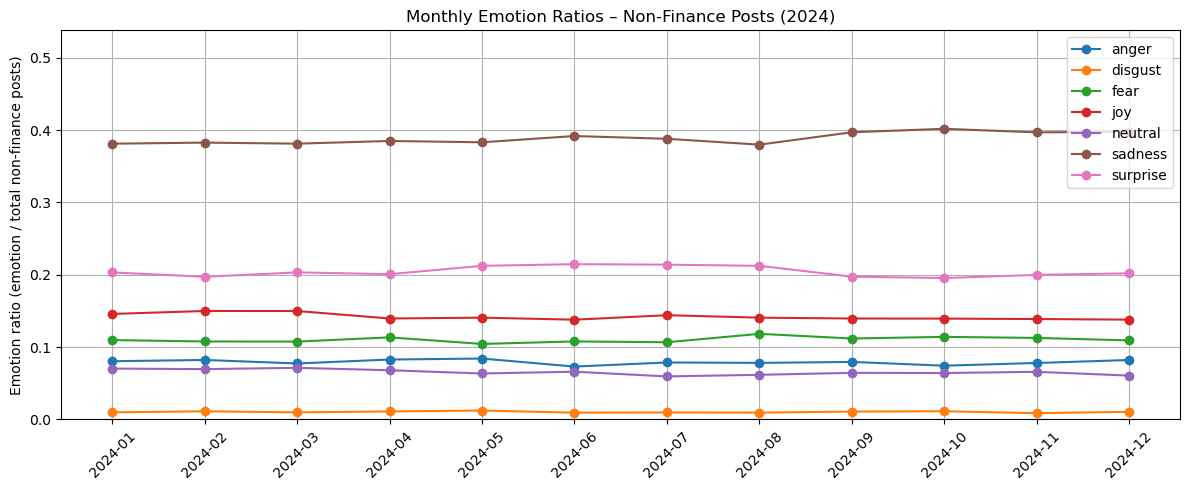

In [40]:
import matplotlib.pyplot as plt

# Common y max so scales match
ymax = max(emo_fin_24["ratio"].max(), emo_notfin_24["ratio"].max())

# -------- Finance --------
plt.figure(figsize=(12,5))
for emo in emo_fin_24["basic_emotion"].unique():
    sub = emo_fin_24[emo_fin_24["basic_emotion"] == emo]
    plt.plot(sub["year_month"], sub["ratio"], marker="o", label=emo)

plt.ylim(0, ymax)
plt.xticks(rotation=45)
plt.ylabel("Emotion ratio (emotion / total finance posts)")
plt.title("Monthly Emotion Ratios – Finance Posts (2024)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# -------- Not finance --------
plt.figure(figsize=(12,5))
for emo in emo_notfin_24["basic_emotion"].unique():
    sub = emo_notfin_24[emo_notfin_24["basic_emotion"] == emo]
    plt.plot(sub["year_month"], sub["ratio"], marker="o", label=emo)

plt.ylim(0, ymax)
plt.xticks(rotation=45)
plt.ylabel("Emotion ratio (emotion / total non-finance posts)")
plt.title("Monthly Emotion Ratios – Non-Finance Posts (2024)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [25]:
df_2024 = df[df["year_month"].str.startswith("2024")].copy()
emotion_cols = [c for c in df_2024.columns if c.startswith("emotion_") and c != "emotion_polarity" ]

print("Emotion score columns:", emotion_cols)


Emotion score columns: ['emotion_admiration', 'emotion_amusement', 'emotion_anger', 'emotion_annoyance', 'emotion_approval', 'emotion_caring', 'emotion_confusion', 'emotion_curiosity', 'emotion_desire', 'emotion_disappointment', 'emotion_disapproval', 'emotion_disgust', 'emotion_embarrassment', 'emotion_excitement', 'emotion_fear', 'emotion_gratitude', 'emotion_grief', 'emotion_joy', 'emotion_love', 'emotion_nervousness', 'emotion_optimism', 'emotion_pride', 'emotion_realization', 'emotion_relief', 'emotion_remorse', 'emotion_sadness', 'emotion_surprise', 'emotion_neutral']


In [26]:
corr = df_2024[emotion_cols].corr()
corr


,emotion_admiration,emotion_amusement,emotion_anger,emotion_annoyance,emotion_approval,emotion_caring,emotion_confusion,emotion_curiosity,emotion_desire,emotion_disappointment,...,emotion_love,emotion_nervousness,emotion_optimism,emotion_pride,emotion_realization,emotion_relief,emotion_remorse,emotion_sadness,emotion_surprise,emotion_neutral
emotion_admiration,1.000000,0.004515,-0.032875,-0.062583,0.157254,0.000986,-0.054549,-0.010698,-0.014090,-0.115849,...,0.078487,-0.034787,0.032768,NaN,-0.039994,NaN,-0.024866,-0.098570,0.012883,-0.064790
emotion_amusement,0.004515,1.000000,-0.012865,0.000862,-0.017459,-0.022115,-0.017694,0.003449,-0.008846,-0.103494,...,-0.002349,-0.025313,0.001946,NaN,-0.015558,NaN,-0.011806,-0.071923,-0.003435,-0.035363
emotion_anger,-0.032875,-0.012865,1.000000,0.644019,-0.054434,-0.038337,-0.123133,-0.102714,-0.017543,-0.081314,...,-0.029115,-0.060263,-0.038295,NaN,-0.091299,NaN,-0.049043,-0.113285,-0.029422,-0.121570
emotion_annoyance,-0.062583,0.000862,0.644019,1.000000,-0.092523,-0.079595,-0.187993,-0.161901,-0.062247,0.129566,...,-0.081766,-0.110127,-0.077529,NaN,-0.127223,NaN,-0.089928,-0.167207,-0.044134,-0.133290
emotion_approval,0.157254,-0.017459,-0.054434,-0.092523,1.000000,0.222669,-0.082632,-0.080469,-0.017323,-0.181092,...,-0.001966,-0.058736,0.047976,NaN,0.153483,NaN,-0.046269,-0.172596,-0.026516,0.203674
emotion_caring,0.000986,-0.022115,-0.038337,-0.079595,0.222669,1.000000,-0.110319,-0.076239,0.105086,-0.142016,...,-0.005873,-0.010344,0.177648,NaN,-0.058185,NaN,-0.016760,-0.037827,-0.028824,0.066298
emotion_confusion,-0.054549,-0.017694,-0.123133,-0.187993,-0.082632,-0.110319,1.000000,0.477383,-0.097015,-0.295063,...,-0.062277,-0.086886,-0.076106,NaN,-0.026388,NaN,-0.048336,-0.313084,0.015119,0.006771
emotion_curiosity,-0.010698,0.003449,-0.102714,-0.161901,-0.080469,-0.076239,0.477383,1.000000,-0.059765,-0.375295,...,-0.035453,-0.052158,-0.048127,NaN,-0.137902,NaN,-0.006762,-0.286225,0.118930,0.011676
emotion_desire,-0.014090,-0.008846,-0.017543,-0.062247,-0.017323,0.105086,-0.097015,-0.059765,1.000000,-0.095576,...,0.075010,-0.034478,0.184336,NaN,-0.067886,NaN,-0.038920,0.003810,-0.024852,-0.035190
emotion_disappointment,-0.115849,-0.103494,-0.081314,0.129566,-0.181092,-0.142016,-0.295063,-0.375295,-0.095576,1.000000,...,-0.153791,-0.092831,-0.095437,NaN,-0.015102,NaN,-0.048778,0.603915,-0.096228,-0.237862


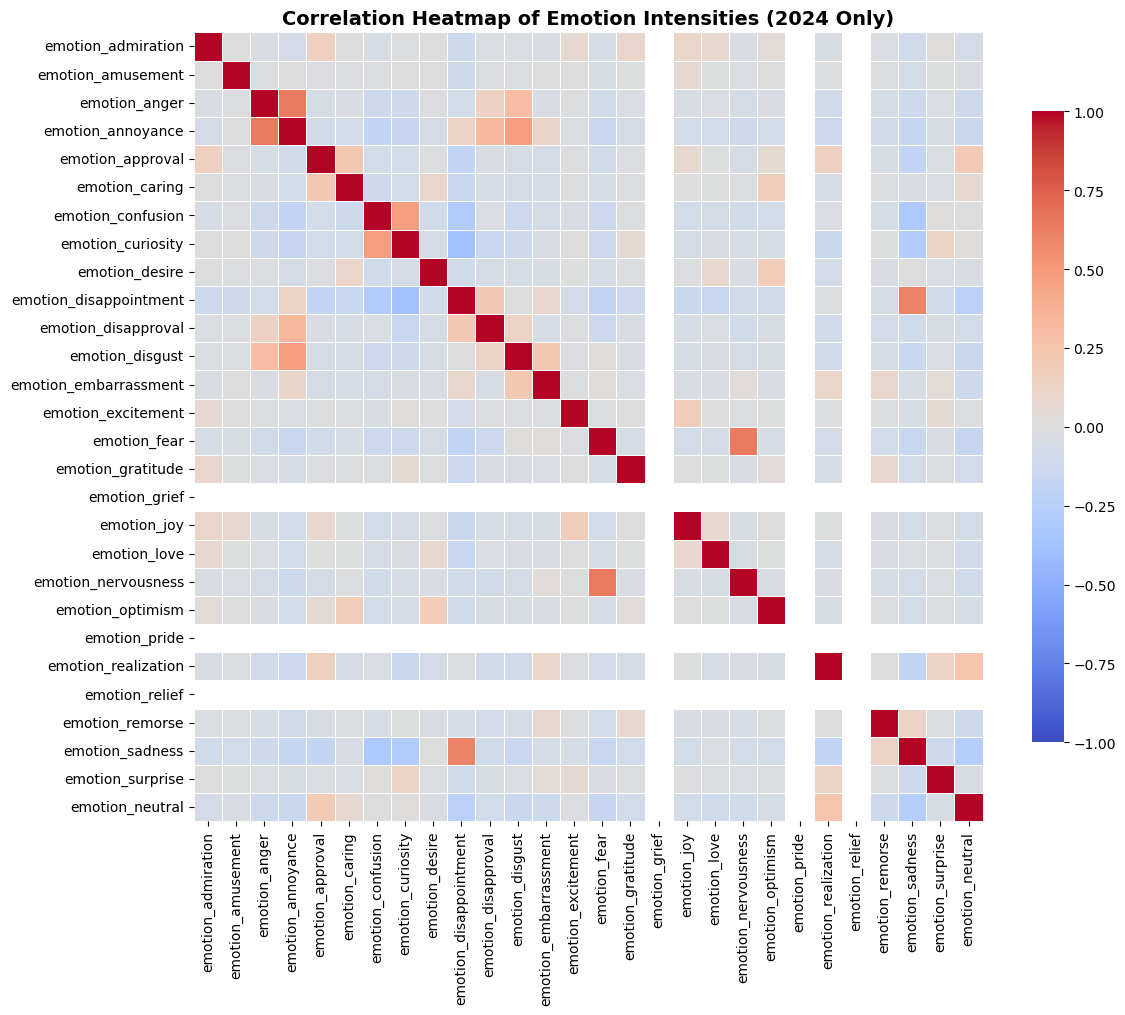

In [27]:
plt.figure(figsize=(12, 10))

sns.heatmap(
    corr,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    center=0,
    annot=False,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap of Emotion Intensities (2024 Only)", fontsize=14, weight="bold")
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


In [28]:
# Identify columns that contain emotion scores (27 emotions)
emotion_score_cols = [c for c in df.columns if c.startswith("emotion_") and c != "emotion_polarity" ]
print("Emotion score columns found:", len(emotion_score_cols))



Emotion score columns found: 28


In [29]:
from collections import defaultdict

basic_groups = defaultdict(list)

for emo, basic in emotion_map.items():
    col = f"emotion_{emo}"
    if col in emotion_score_cols:
        basic_groups[basic].append(col)

basic_groups



defaultdict(list,
            {'anger': ['emotion_anger',
              'emotion_annoyance',
              'emotion_disapproval'],
             'disgust': ['emotion_disgust'],
             'fear': ['emotion_fear', 'emotion_nervousness'],
             'joy': ['emotion_amusement',
              'emotion_excitement',
              'emotion_joy',
              'emotion_love',
              'emotion_optimism',
              'emotion_pride',
              'emotion_realization',
              'emotion_relief',
              'emotion_admiration',
              'emotion_approval',
              'emotion_gratitude',
              'emotion_desire',
              'emotion_caring'],
             'sadness': ['emotion_sadness',
              'emotion_disappointment',
              'emotion_embarrassment',
              'emotion_remorse',
              'emotion_grief'],
             'surprise': ['emotion_surprise',
              'emotion_confusion',
              'emotion_curiosity'],
             'ne

In [30]:
# Create new columns for each basic emotion
for basic, cols in basic_groups.items():
    df[f"basicint_{basic}"] = df[cols].sum(axis=1)
basic_intensity_cols = [
    "basicint_anger",
    "basicint_disgust",
    "basicint_fear",
    "basicint_joy",
    "basicint_sadness",
    "basicint_surprise"
]


In [31]:
df_fin = df[df["finance_label"] == "finance"]
df_non = df[df["finance_label"] == "not finance"]


In [32]:
corr_fin = df_fin[basic_intensity_cols].corr()
corr_non = df_non[basic_intensity_cols].corr()


In [33]:
corr_non

,basicint_anger,basicint_disgust,basicint_fear,basicint_joy,basicint_sadness,basicint_surprise
basicint_anger,1.000000,0.414425,-0.162758,-0.202298,-0.067471,-0.205032
basicint_disgust,0.414425,1.000000,-0.000187,-0.135369,-0.069742,-0.143989
basicint_fear,-0.162758,-0.000187,1.000000,-0.166201,-0.185231,-0.152032
basicint_joy,-0.202298,-0.135369,-0.166201,1.000000,-0.301259,-0.166004
basicint_sadness,-0.067471,-0.069742,-0.185231,-0.301259,1.000000,-0.407429
basicint_surprise,-0.205032,-0.143989,-0.152032,-0.166004,-0.407429,1.000000


In [46]:
corr_fin

,basicint_anger,basicint_disgust,basicint_fear,basicint_joy,basicint_sadness,basicint_surprise
basicint_anger,1.000000,0.393048,-0.149795,-0.210797,-0.106530,-0.138922
basicint_disgust,0.393048,1.000000,0.001341,-0.122550,-0.085310,-0.098711
basicint_fear,-0.149795,0.001341,1.000000,-0.159054,-0.191617,-0.106914
basicint_joy,-0.210797,-0.122550,-0.159054,1.000000,-0.404812,-0.098963
basicint_sadness,-0.106530,-0.085310,-0.191617,-0.404812,1.000000,-0.374581
basicint_surprise,-0.138922,-0.098711,-0.106914,-0.098963,-0.374581,1.000000


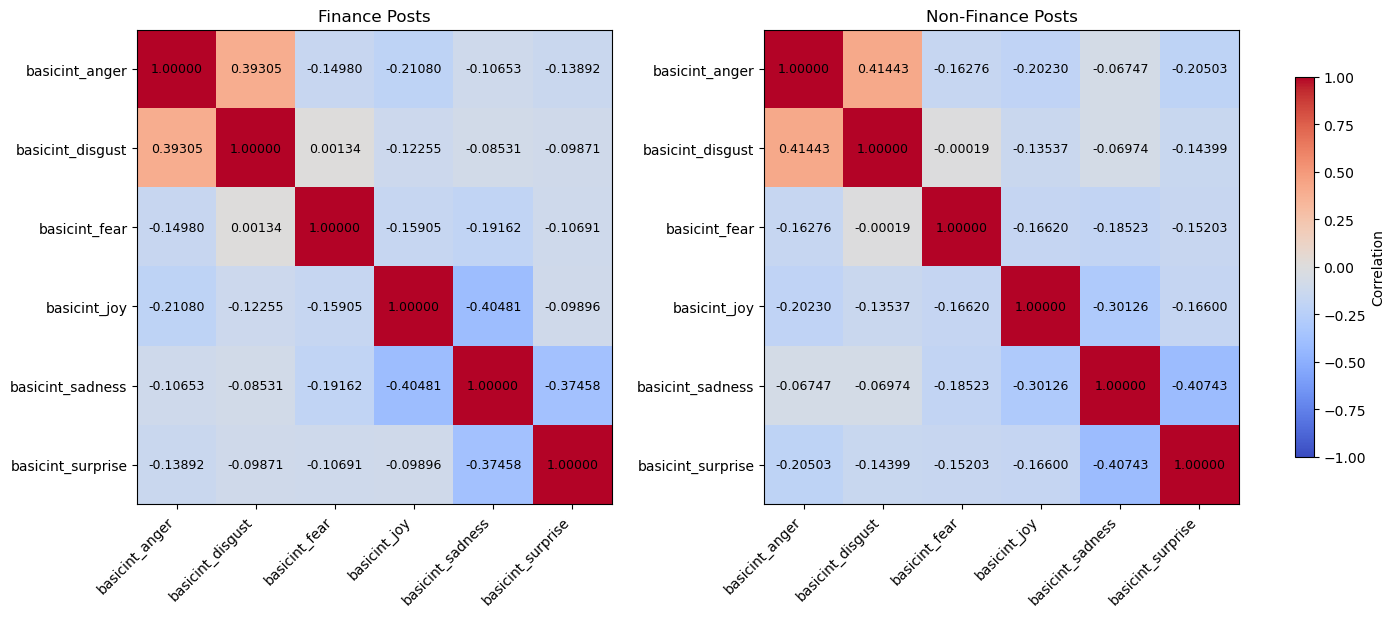

In [55]:
import numpy as np
import matplotlib.pyplot as plt

labels = corr_fin.columns.tolist()

fig, axes = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

for ax, corr, title in zip(
    axes,
    [corr_fin, corr_non],
    ["Finance Posts", "Non-Finance Posts"]
):
    im = ax.imshow(corr.values, vmin=-1, vmax=1, cmap="coolwarm")

    # ticks + labels
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.set_yticklabels(labels)
    ax.set_title(title)

    # annotate numbers
    for i in range(corr.shape[0]):
        for j in range(corr.shape[1]):
            ax.text(
                j, i,
                f"{corr.values[i, j]:.5f}",
                ha="center",
                va="center",
                color="black",
                fontsize=9
            )

# shared colorbar
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.8)
cbar.set_label("Correlation")

plt.show()
